ENTREGA FINAL- PROYECTO- SANTIAGO REYMONDES- santiagoreymondes@gmail.com

# ***INTRODUCCION***
El dataset analizado contiene información detallada sobre compras realizadas por clientes, incluyendo variables demográficas, características de los productos adquiridos y detalles de las transacciones. Entre las variables clave se encuentran el género y la edad de los clientes, la categoría de los productos comprados, el monto gastado, la temporada en la que se realizó la compra y el método de pago utilizado. Además, se incluyen datos sobre el estado de suscripción de los clientes, la aplicación de descuentos y el uso de códigos promocionales, lo que permite evaluar patrones de fidelización y estrategias de precios.

Uno de los aspectos centrales del análisis es la exploración de posibles relaciones entre estas variables. Se investigan diversas hipótesis, como la distribución de compras de accesorios según el género, la frecuencia de compra por grupos etarios y la posible preferencia de los clientes más jóvenes por métodos de pago digitales. Además, se examina si los colores de los productos varían según la estación del año, lo que podría indicar una preferencia estacional en la elección de ciertos tonos.

El dataset permite, por lo tanto, estudiar patrones de comportamiento de consumo a partir de variables tanto individuales como transaccionales. Su estructura facilita la segmentación de clientes y el análisis de tendencias que podrían ser útiles para estrategias comerciales y de marketing, optimización de precios y personalización de la oferta.

# ***ANALISIS EXPLORATORIO***

Saving COMPRASdataset.xlsx to COMPRASdataset.xlsx

Clientes por género:
gender
Male      2652
Female    1248
Name: count, dtype: int64

Proporción con suscripción:
subscription_status
No     0.73
Yes    0.27
Name: proportion, dtype: float64

Proporción con descuento:
discount_applied
No     0.57
Yes    0.43
Name: proportion, dtype: float64

Estadísticas numéricas:
               age  purchase_amount_usd  review_rating
count  3900.000000          3900.000000    3900.000000
mean     44.068462            59.764359       3.749949
std      15.207589            23.685392       0.716223
min      18.000000            20.000000       2.500000
25%      31.000000            39.000000       3.100000
50%      44.000000            60.000000       3.700000
75%      57.000000            81.000000       4.400000
max      70.000000           100.000000       5.000000
mode     69.000000            32.000000       3.400000

Monto total por categoría:
category
Accessories     74200
Clothing       104264
Fo

<ipython-input-2-b3d9d116447a>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["payment_method"], order=df["payment_method"].value_counts().index, palette="viridis")


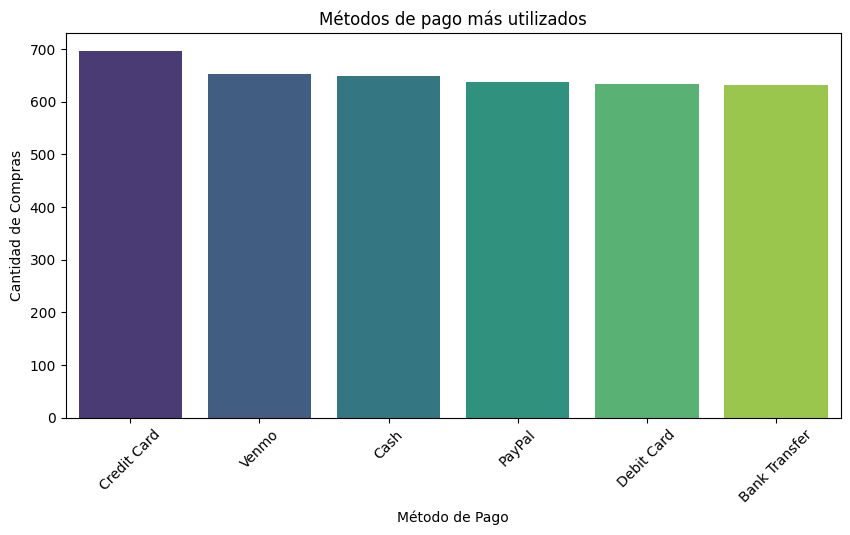

<ipython-input-2-b3d9d116447a>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["category"], order=df["category"].value_counts().index, palette="magma")


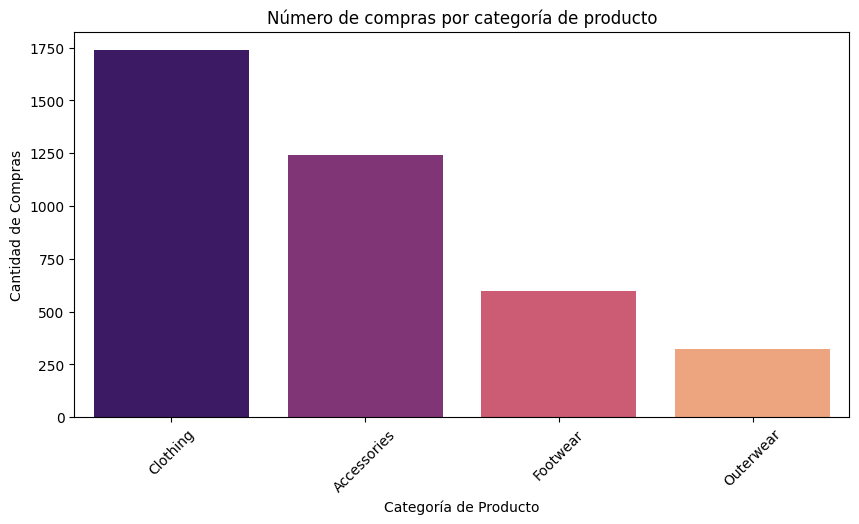

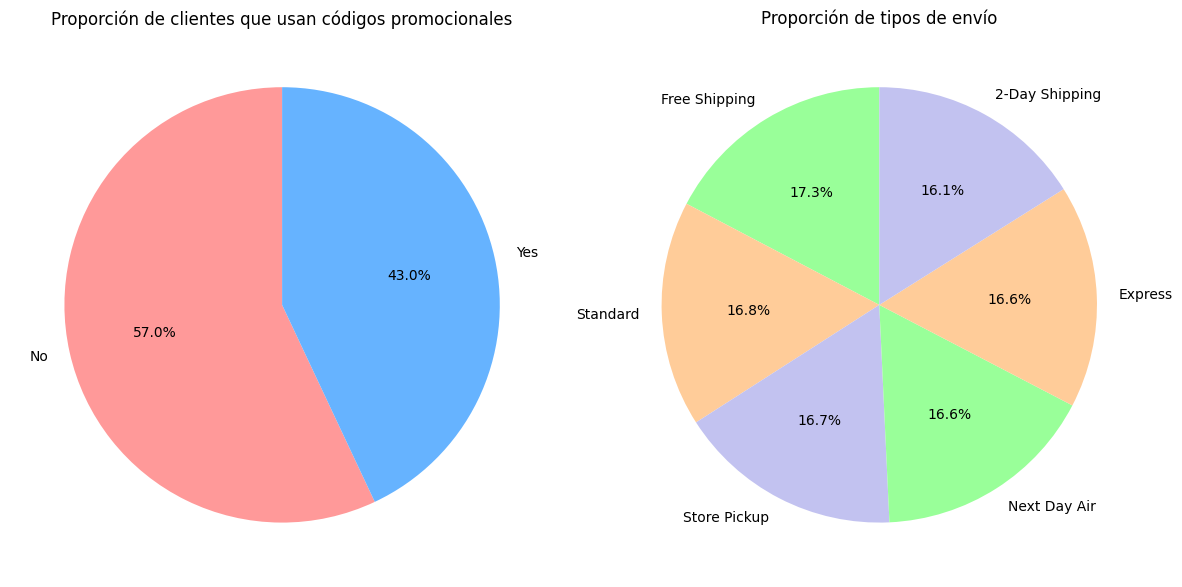

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el dataset
df = pd.read_excel(file_name)

# Limpiar nombres de columnas y convertirlos a formato estándar
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Renombrar columnas problemáticas si es necesario
column_renames = {
    "gender": "gender",
    "location": "location",
    "subscription_status": "subscription_status",
    "discount_applied": "discount_applied",
    "age": "age",
    "purchase_amount_(usd)": "purchase_amount_usd",
    "review_rating": "review_rating",
    "category": "category",
    "season": "season",
    "payment_method": "payment_method",
    "promo_code_used": "promo_code_used",
    "shipping_type": "shipping_type",
    "product_size": "product_size"
}
df.rename(columns=column_renames, inplace=True)

# Descripción general
def dataset_summary(df):
    summary = {}

# Proporciones y estadisticas descriptivas
    if "gender" in df.columns:
        summary["Clientes por género"] = df["gender"].value_counts()
    if "subscription_status" in df.columns:
        summary["Proporción con suscripción"] = df["subscription_status"].value_counts(normalize=True)
    if "discount_applied" in df.columns:
        summary["Proporción con descuento"] = df["discount_applied"].value_counts(normalize=True)

    numerical_cols = [col for col in ["age", "purchase_amount_usd", "review_rating"] if col in df.columns]
    if numerical_cols:
        stats = df[numerical_cols].describe()
        stats.loc["mode"] = df[numerical_cols].mode().iloc[0]
        summary["Estadísticas numéricas"] = stats

    # Monto total y promedio por categoría y temporada
    if "category" in df.columns and "purchase_amount_usd" in df.columns:
        summary["Monto total por categoría"] = df.groupby("category")["purchase_amount_usd"].sum()
    if "season" in df.columns and "purchase_amount_usd" in df.columns:
        summary["Monto promedio por temporada"] = df.groupby("season")["purchase_amount_usd"].mean()

    return summary

# resumen del dataset
summary = dataset_summary(df)

# Imprimir los resultados
for key, value in summary.items():
    print(f"\n{key}:")
    print(value)

# Gráficos
plt.figure(figsize=(10, 5))
sns.countplot(x=df["payment_method"], order=df["payment_method"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Métodos de pago más utilizados")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=df["category"], order=df["category"].value_counts().index, palette="magma")
plt.xticks(rotation=45)
plt.title("Número de compras por categoría de producto")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Compras")
plt.show()

# Gráfico Pastel
plt.figure(figsize=(12, 6))

# Proporción de clientes que usan códigos promocionales
if "promo_code_used" in df.columns:
    plt.subplot(1, 2, 1)
    df["promo_code_used"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff"], startangle=90)
    plt.title("Proporción de clientes que usan códigos promocionales")
    plt.ylabel("")

# Proporción de tipos de envío
if "shipping_type" in df.columns:
    plt.subplot(1, 2, 2)
    df["shipping_type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#99ff99","#ffcc99", "#c2c2f0"], startangle=90)
    plt.title("Proporción de tipos de envío")
    plt.ylabel("")

plt.tight_layout()
plt.show()


Se observa una preferencia de los consumidores por comprar prendas de vestir. Ademas, evaluando otros aspectos generales, es posible asegurar que la proporcion de clientes que usan codigos promocionales es mayor que la de aquellos que los usan. Otro aspecto importante descubierto mediante la utilizacion de los codigos es que la proporcion de los tipos de envios es muy similar para todos los metodos, sin existir un metodo de envio que resalte sobre oos demas.


 Matriz de correlación de Pearson entre variables numéricas:



,customer_id,age,purchase_amount_usd,review_rating,previous_purchases
customer_id,1.00,-0.00,0.01,0.00,-0.04
age,-0.00,1.00,-0.01,-0.02,0.04
purchase_amount_usd,0.01,-0.01,1.00,0.03,0.01
review_rating,0.00,-0.02,0.03,1.00,0.00
previous_purchases,-0.04,0.04,0.01,0.00,1.00


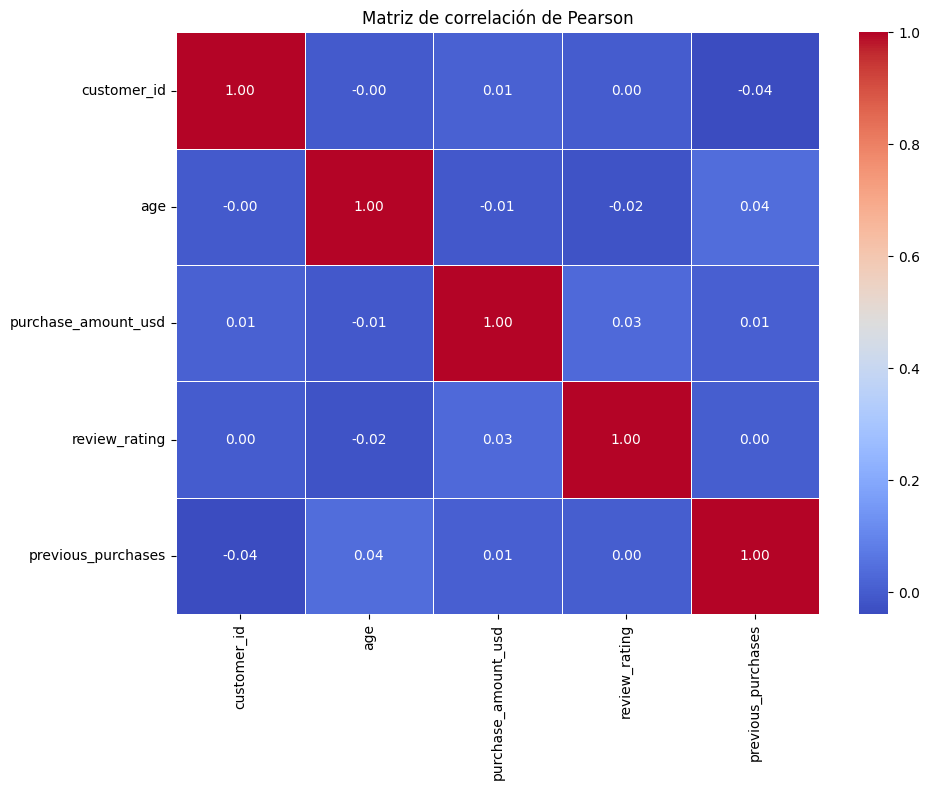

In [ ]:
# Análisis de correlación entre variables numéricas
# Selección de variables numéricas
numeric_cols = df.select_dtypes(include=["number"])

# Cálculo de matriz de correlación de Pearson
correlation_matrix = numeric_cols.corr()

# Mostrar la matriz como tabla
print("\n Matriz de correlación de Pearson entre variables numéricas:\n")
display(correlation_matrix.round(2))

# Visualización con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación de Pearson")
plt.tight_layout()
plt.show()


Las correlaciones observadas entre las variables numéricas no son particularmente altas, lo que sugiere que no existen relaciones lineales fuertes entre ellas. Esto implica que las variables analizadas varían de manera relativamente independiente, al menos desde el punto de vista lineal capturado por el coeficiente de Pearson.

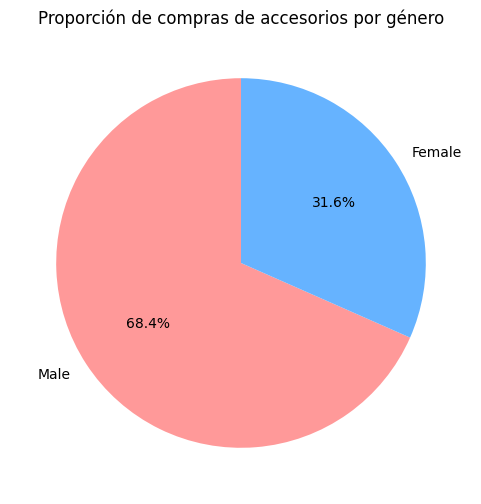

<ipython-input-4-35f7ea8cbaaa>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compras_por_decile.index.astype(str), y=compras_por_decile.values, palette="coolwarm")


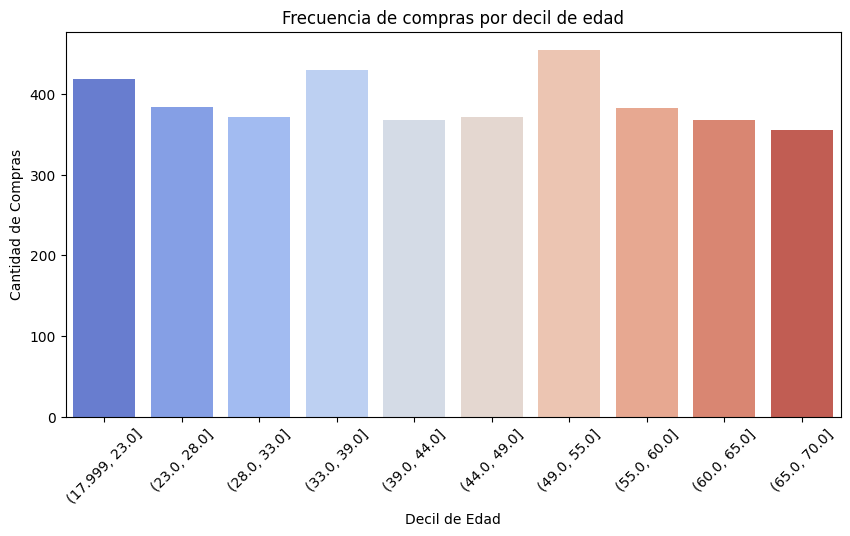

<ipython-input-4-35f7ea8cbaaa>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=jovenes_df["payment_method"], order=jovenes_df["payment_method"].value_counts().index, palette="viridis")


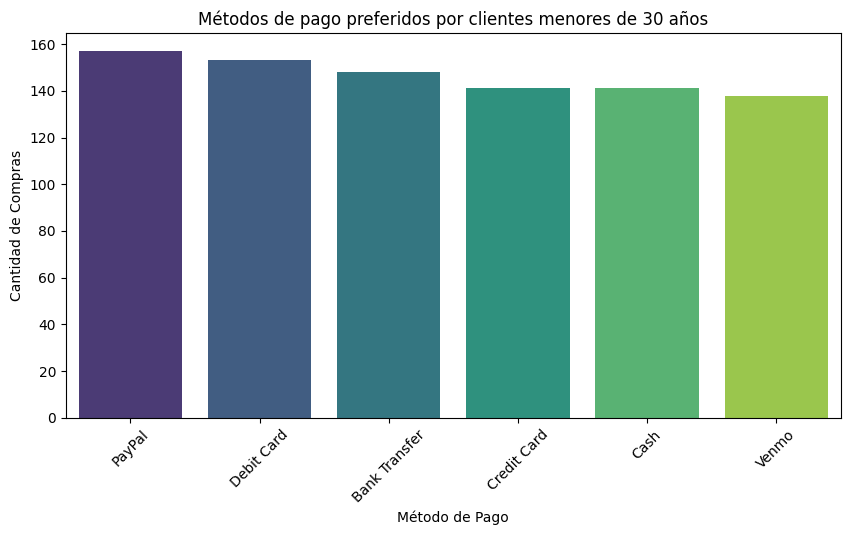

<ipython-input-4-35f7ea8cbaaa>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=verano_df["color"], order=verano_df["color"].value_counts().index, palette="YlOrBr")


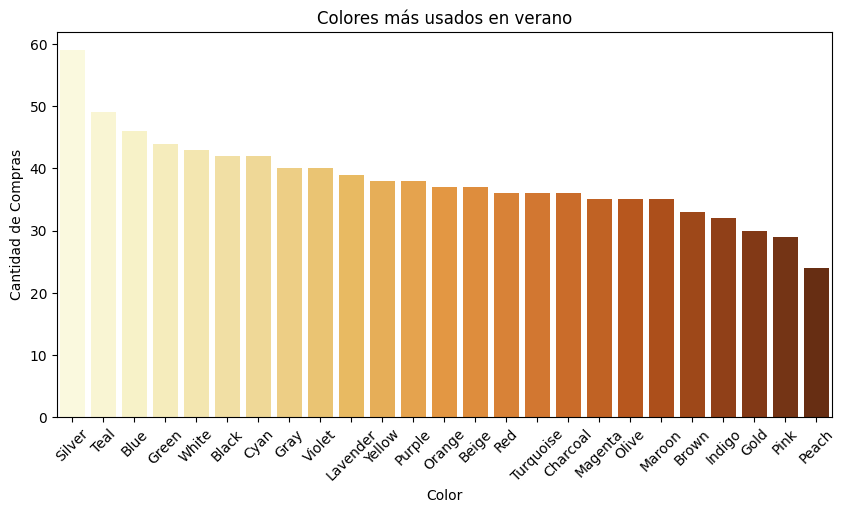

<ipython-input-4-35f7ea8cbaaa>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=invierno_df["color"], order=invierno_df["color"].value_counts().index, palette="Blues")


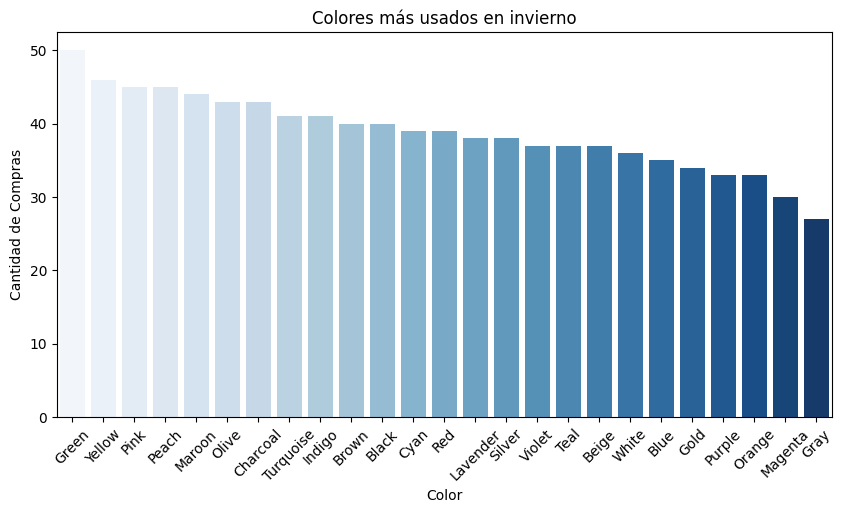

In [ ]:
# CHEQUEO DE PRIMERAS HIPÓTESIS

# 0. Las mujeres compran más accesorios que los hombres?

if "gender" in df.columns and "category" in df.columns:
    accesorios_df = df[df["category"] == "Accessories"]
    if not accesorios_df.empty:
        plt.figure(figsize=(6, 6))
        accesorios_df["gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff"], startangle=90)
        plt.title("Proporción de compras de accesorios por género")
        plt.ylabel("")
        plt.show()
    else:
        print("No hay datos de accesorios en el dataset.")
else:
    print("Las columnas 'gender' o 'category' no están presentes en el dataset.")

# HIPOTESIS 1. ¿Los clientes más jóvenes realizan compras con mayor frecuencia que los clientes mayores?
# Gráfico de frecuencias de compra por deciles de edad.

if "age" in df.columns:
    # Crear deciles de edad
    df["age_decile"] = pd.qcut(df["age"], q=10, duplicates="drop")

    # Contar la frecuencia de compras por decil de edad
    compras_por_decile = df["age_decile"].value_counts().sort_index()

    # Gráfico de barras
    plt.figure(figsize=(10, 5))
    sns.barplot(x=compras_por_decile.index.astype(str), y=compras_por_decile.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("Frecuencia de compras por decil de edad")
    plt.xlabel("Decil de Edad")
    plt.ylabel("Cantidad de Compras")
    plt.show()
else:
    print("La columna 'age' no está presente en el dataset.")

# HIPOTESIS 2. Hipótesis de Edad y Método de Pago:
# ¿La edad influye en la preferencia de métodos de pago (por ejemplo, los jóvenes prefieren métodos digitales como Venmo)?
# Fijarse en los jóvenes (menores de 30).

if "age" in df.columns and "payment_method" in df.columns:
    # Filtrar clientes menores de 30 años
    jovenes_df = df[df["age"] < 30]

    if not jovenes_df.empty:
        # Gráfico de barras para métodos de pago preferidos por jóvenes
        plt.figure(figsize=(10, 5))
        sns.countplot(x=jovenes_df["payment_method"], order=jovenes_df["payment_method"].value_counts().index, palette="viridis")
        plt.xticks(rotation=45)
        plt.title("Métodos de pago preferidos por clientes menores de 30 años")
        plt.xlabel("Método de Pago")
        plt.ylabel("Cantidad de Compras")
        plt.show()
    else:
        print("No hay datos de clientes menores de 30 años en el dataset.")
else:
    print("Las columnas 'age' o 'payment_method' no están presentes en el dataset.")

# HIPOTESIS 3. Hipótesis de Color y Temporada:
# ¿El color de los productos comprados varía según la temporada (por ejemplo, colores más oscuros en invierno y colores más claros en verano)?
# Gráficos de barras para colores más usados en verano e invierno.

if "color" in df.columns and "season" in df.columns:
    # Filtrar datos para verano e invierno
    verano_df = df[df["season"] == "Summer"]
    invierno_df = df[df["season"] == "Winter"]

    if not verano_df.empty and not invierno_df.empty:
        # Colores más usados en verano
        plt.figure(figsize=(10, 5))
        sns.countplot(x=verano_df["color"], order=verano_df["color"].value_counts().index, palette="YlOrBr")
        plt.xticks(rotation=45)
        plt.title("Colores más usados en verano")
        plt.xlabel("Color")
        plt.ylabel("Cantidad de Compras")
        plt.show()

        # Colores más usados en invierno
        plt.figure(figsize=(10, 5))
        sns.countplot(x=invierno_df["color"], order=invierno_df["color"].value_counts().index, palette="Blues")
        plt.xticks(rotation=45)
        plt.title("Colores más usados en invierno")
        plt.xlabel("Color")
        plt.ylabel("Cantidad de Compras")
        plt.show()
    else:
        print("No hay datos suficientes para verano o invierno en el dataset.")
else:
    print("Las columnas 'color' o 'season' no están presentes en el dataset.")

H0:En las ventas totales de la categoria accesorios, hay un claro predominio del genero femenino, las cuales representan un 68% de las ventas.

H1: En cuanto a la frecuencia de compras, es posible observar que los deciles mas jovenes son uno de los tres grupos que con mayor frecuencia compran, pero mas que ellos compran las personas entre 33 Y 39, y aquellos entre 49 y 55.

H2: No parece haber ningun cambio significativo en los metodos de pago utilizados por las personas categorizadas como jovenes (menores de 30). La utilizacion de los medios de pago es muy similar entre todas las opciones, asi como sucedia con los metodos de envio.

H3: Es posible observar una clara diferencia entre los colores mas adquiridos por los consumidores en el verano y en el invierno, con una ponderacion mayor hacia los claros en la epoca de verano

<ipython-input-5-97a309e24a8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=silver_counts.index, y=silver_counts.values, palette="coolwarm")


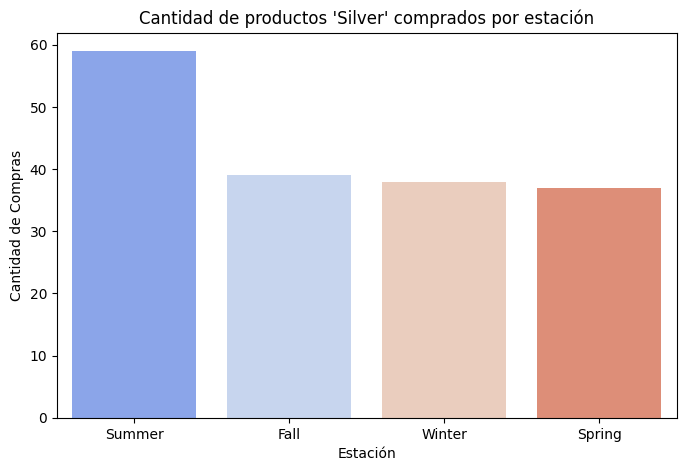

In [ ]:
# HIPOTESIS 4. Hipótesis: ¿El color 'Silver' se compra más en verano que en invierno?
if "color" in df.columns and "season" in df.columns:
    # Filtrar datos solo para productos de color "Silver"
    silver_df = df[df["color"].str.lower() == "silver"]

    if not silver_df.empty:
        # Contar la cantidad de compras de "Silver" por estación
        silver_counts = silver_df["season"].value_counts()

        # Gráfico de barras
        plt.figure(figsize=(8, 5))
        sns.barplot(x=silver_counts.index, y=silver_counts.values, palette="coolwarm")
        plt.title("Cantidad de productos 'Silver' comprados por estación")
        plt.xlabel("Estación")
        plt.ylabel("Cantidad de Compras")
        plt.show()
    else:
        print("No hay datos de productos de color 'Silver' en el dataset.")
else:
    print("Las columnas 'color' o 'season' no están presentes en el dataset.")


H4: Se observa una preponderancia en la compra del color plateado en la epoca de verano, lo que puede ayudar a interpretar el patron de consumo de los agentes.

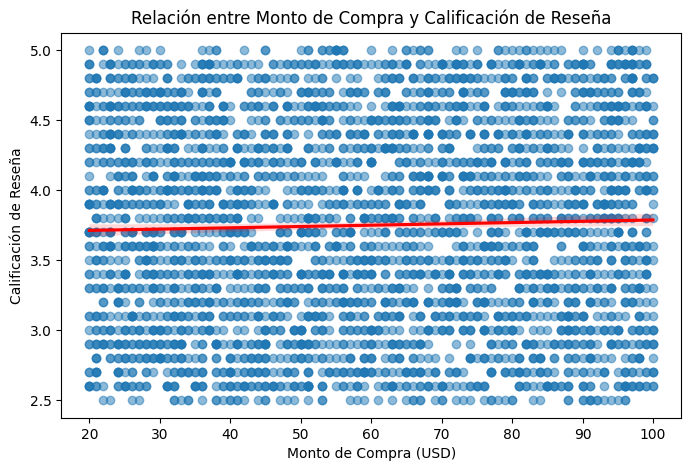

Correlación entre Monto de Compra y Calificación de Reseña: 0.03


In [ ]:
# HIPOTESIS 5. Hipótesis: ¿A mayor monto de compra, mayor calificación de reseña?
if "purchase_amount_usd" in df.columns and "review_rating" in df.columns:
    plt.figure(figsize=(8, 5))

    # Gráfico de dispersión con línea de regresión
    sns.regplot(x=df["purchase_amount_usd"], y=df["review_rating"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

    plt.title("Relación entre Monto de Compra y Calificación de Reseña")
    plt.xlabel("Monto de Compra (USD)")
    plt.ylabel("Calificación de Reseña")
    plt.show()

    # Calcular correlación
    correlacion = df["purchase_amount_usd"].corr(df["review_rating"])
    print(f"Correlación entre Monto de Compra y Calificación de Reseña: {correlacion:.2f}")
else:
    print("Las columnas 'purchase_amount_usd' o 'review_rating' no están presentes en el dataset.")


No hay evidencia para afirmar que la hipotesis es correcta, sino que no parecen estar correlacionadas las variables.

# ***APRENDIZAJE NO SUPERVISADO***

Este análisis se propone identificar distintos grupos de clientes en base a sus características de compra, utilizando técnicas de segmentación automática. A través del algoritmo de clustering K-Means, se busca agrupar a los usuarios según patrones comunes en variables como la edad, el monto gastado, la frecuencia de compras y otras dimensiones relevantes del comportamiento de consumo.

El objetivo es descubrir perfiles de clientes diferenciados que permitan interpretar con mayor profundidad cómo interactúan con la tienda online. Esta segmentación puede aportar información clave para diseñar estrategias más efectivas, tanto comerciales como de fidelización, basadas en el comportamiento real de los usuarios.

Para reducir la complejidad del modelo y trabajar con un conjunto de variables más representativo, se seleccionaron aquellas variables que presentan mayor relevancia para describir el comportamiento de los clientes. Se eliminaron columnas irrelevantes como identificadores únicos o textos no estructurados (por ejemplo: customer_id, item_purchased, etc.).

Luego, se aplicó la técnica de Análisis de Componentes Principales (PCA) como método de reducción de dimensionalidad, permitiendo representar la información contenida en múltiples variables en un menor número de componentes principales. Esto facilita la visualización de los datos y mejora la eficiencia de los algoritmos de segmentación y clasificación aplicados posteriormente.

Componentes seleccionados: 16
Porcentaje de varianza explicada por componente:
[0.11879231 0.06598686 0.06188073 0.06040319 0.05705857 0.05635991
 0.05542343 0.05506687 0.05489672 0.0541726  0.05280402 0.0521264
 0.05050606 0.04676023 0.043824   0.04260855]


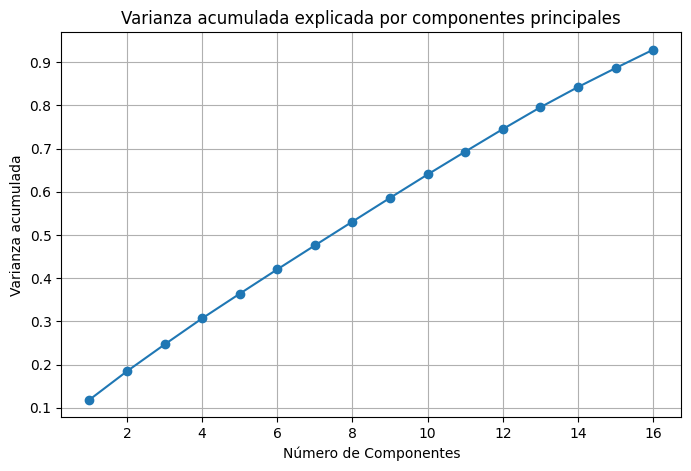

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selección de variables relevantes para segmentación
# (Excluimos columnas no útiles como 'customer_id', 'item_purchased' o textos irrelevantes)
variables_para_modelo = df[[
    "age", "purchase_amount_usd", "review_rating", "category",
    "season", "payment_method", "shipping_type", "subscription_status",
    "discount_applied", "promo_code_used"
]]

# Convertir variables categóricas en variables dummy (One-Hot Encoding)
variables_dummies = pd.get_dummies(variables_para_modelo, drop_first=True)

#Estandarizar las variables (muy importante para PCA y KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_dummies)

 #Aplicar PCA (Análisis de Componentes Principales)
pca = PCA(n_components=0.90)  # Mantener 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Mostrar resultados del PCA
print(f"Componentes seleccionados: {X_pca.shape[1]}")
print("Porcentaje de varianza explicada por componente:")
print(pca.explained_variance_ratio_)

#Varianza acumulada para cada componente
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Varianza acumulada explicada por componentes principales")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.show()


In [ ]:
print(variables_dummies.columns.tolist())


['age', 'purchase_amount_usd', 'review_rating', 'category_Clothing', 'category_Footwear', 'category_Outerwear', 'season_Spring', 'season_Summer', 'season_Winter', 'payment_method_Cash', 'payment_method_Credit Card', 'payment_method_Debit Card', 'payment_method_PayPal', 'payment_method_Venmo', 'shipping_type_Express', 'shipping_type_Free Shipping', 'shipping_type_Next Day Air', 'shipping_type_Standard', 'shipping_type_Store Pickup', 'subscription_status_Yes', 'discount_applied_Yes', 'promo_code_used_Yes']


De K=1 a K=3, la inercia cae mucho. A partir de K=4 en adelante, la caída es más suave y progresiva. Por lo tanto, basandonos en el grafico, es posible afirmar que el numero de clsuters optimos en este modelo es de 3

In [ ]:
from sklearn.cluster import KMeans

# Entrenar el modelo KMeans con K=3
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Agregar los resultados al DataFrame original
df["cluster"] = clusters

# Mostrar la cantidad de clientes en cada grupo
print("Cantidad de clientes por clúster:")
print(df["cluster"].value_counts())


Cantidad de clientes por clúster:
cluster
1    1854
2    1392
0     654
Name: count, dtype: int64


In [ ]:
# Promedios de edad, monto gastado y calificación por clúster
print("Promedios por clúster:\n")
print(df.groupby("cluster")[["age", "purchase_amount_usd", "review_rating"]].mean())

# Distribución de categorías de producto por clúster
print("\nCategoría más frecuente por clúster:\n")
print(df.groupby("cluster")["category"].agg(lambda x: x.value_counts().index[0]))

# Distribución de temporada por clúster
print("\nEstación más frecuente por clúster:\n")
print(df.groupby("cluster")["season"].agg(lambda x: x.value_counts().index[0]))

# Proporción de suscripción por clúster
print("\nProporción de suscriptos por clúster:\n")
print(df.groupby("cluster")["subscription_status"].value_counts(normalize=True).unstack())


Promedios por clúster:

               age  purchase_amount_usd  review_rating
cluster                                               
0        44.764526            58.460245       3.817737
1        43.946602            60.481122       3.740669
2        43.903736            59.422414       3.730460

Categoría más frecuente por clúster:

cluster
0    Clothing
1    Clothing
2    Clothing
Name: category, dtype: object

Estación más frecuente por clúster:

cluster
0      Fall
1      Fall
2    Spring
Name: season, dtype: object

Proporción de suscriptos por clúster:

subscription_status        No       Yes
cluster                                
0                    0.732416  0.267584
1                    1.000000       NaN
2                    0.369253  0.630747


In [ ]:
# Diferencias por género
print("\nDistribución de género por clúster:")
print(df.groupby("cluster")["gender"].value_counts(normalize=True).unstack())

# Promedio de compras anteriores
print("\nPromedio de compras anteriores por clúster:")
print(df.groupby("cluster")["previous_purchases"].mean())

# Método de pago preferido más común
print("\nMétodo de pago preferido por clúster:")
print(df.groupby("cluster")["preferred_payment_method"].agg(lambda x: x.value_counts().index[0]))

# Frecuencia de compra más común
print("\nFrecuencia de compra más común por clúster:")
print(df.groupby("cluster")["frequency_of_purchases"].agg(lambda x: x.value_counts().index[0]))

# Proporción de uso de códigos promocionales
print("\nProporción de uso de códigos promocionales por clúster:")
print(df.groupby("cluster")["promo_code_used"].value_counts(normalize=True).unstack())



Distribución de género por clúster:
gender     Female      Male
cluster                    
0        0.325688  0.674312
1        0.558252  0.441748
2             NaN  1.000000

Promedio de compras anteriores por clúster:
cluster
0    26.232416
1    24.911003
2    25.524425
Name: previous_purchases, dtype: float64

Método de pago preferido por clúster:
cluster
0     Debit Card
1         PayPal
2    Credit Card
Name: preferred_payment_method, dtype: object

Frecuencia de compra más común por clúster:
cluster
0          Annually
1    Every 3 Months
2    Every 3 Months
Name: frequency_of_purchases, dtype: object

Proporción de uso de códigos promocionales por clúster:
promo_code_used       No      Yes
cluster                          
0                0.56422  0.43578
1                1.00000      NaN
2                    NaN  1.00000


Descripcion de los tipos de clusters: Los tres clústers identificados muestran diferencias claras en términos de fidelización y comportamiento de compra:

**Clúster 0**: Clientes con relación prolongada y uso moderado de promociones. Algunos están suscriptos, lo que sugiere una fidelización parcial.

**Clúster 1**: Compradores frecuentes pero no fidelizados. No están suscriptos ni usan promociones. Representan un desafío comercial y podrían requerir estrategias más disruptivas.

**Clúster 2**: Clientes altamente fidelizados, todos usan promociones y gran parte están suscriptos. Ideales para programas de lealtad y retención.

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score: qué tan separados están los clústers
sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score del modelo: {sil_score:.3f}")


Silhouette Score del modelo: 0.107


En el proceso de segmentación se evaluaron distintas técnicas de clustering con el fin de identificar patrones comunes entre los clientes de una tienda online. Se aplicaron los algoritmos K-Means, clustering jerárquico, y DBSCAN como método basado en densidad.

Si bien los resultados obtenidos no muestran una estructura de agrupamiento fuertemente definida, el modelo de K-Means fue el que presentó un desempeño relativamente superior, con un Silhouette Score de 0.107. Esta métrica, aunque no elevada, fue mejor que la obtenida mediante los otros métodos, lo que sugiere una mayor capacidad para separar a los usuarios en grupos internamente cohesivos y externamente diferenciables.

Dado el carácter exploratorio del análisis, y considerando que K-Means ofreció la segmentación más consistente entre las alternativas probadas, se opta por continuar el estudio utilizando los clústers generados por este modelo.

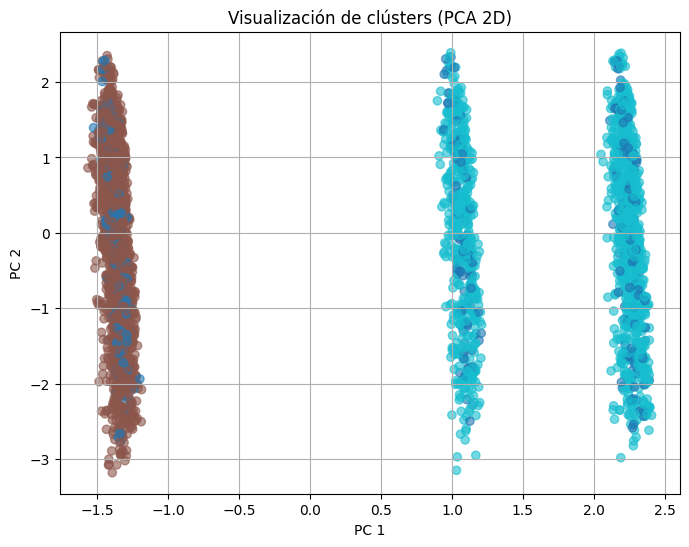

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2D para visualización
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

# Gráfico
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df["cluster"], cmap="tab10", alpha=0.6)
plt.title("Visualización de clústers (PCA 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


In [ ]:
# Obtener los nombres de las variables dummificadas
variable_names = variables_dummies.columns

# Aplicar PCA de nuevo para visualizar solo 2 componentes (ejes del gráfico)
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

# Crear DataFrame con los pesos (loadings)
loadings = pd.DataFrame(
    pca_vis.components_.T,  # Transpuesta para alinear filas con variables
    index=variable_names,   # Variables originales ya codificadas
    columns=["PC1 (eje X)", "PC2 (eje Y)"]
)

# Mostrar pesos
print(" Cargas (loadings) de las variables en las componentes principales:")
display(loadings.sort_values("PC1 (eje X)", key=abs, ascending=False).round(3))  # Ordena por impacto en PC1


 Cargas (loadings) de las variables en las componentes principales:


,PC1 (eje X),PC2 (eje Y)
discount_applied_Yes,0.601,0.017
promo_code_used_Yes,0.601,0.017
subscription_status_Yes,0.523,0.010
category_Clothing,-0.021,0.656
shipping_type_Free Shipping,-0.019,-0.141
payment_method_PayPal,-0.017,-0.107
purchase_amount_usd,-0.017,0.048
payment_method_Cash,0.016,-0.079
season_Summer,0.015,-0.243
shipping_type_Store Pickup,0.013,0.006


El análisis de los clústers construidos mediante K-Means, aplicado sobre una reducción de dimensiones con PCA, muestra que la separación entre los grupos se da principalmente a lo largo del eje horizontal del gráfico, correspondiente a la primera componente principal (PC1). Esta separación no es arbitraria, sino que está fuertemente influenciada por determinadas variables que presentan cargas elevadas en dicha componente, como el uso de descuentos, la aplicación de códigos promocionales y el estado de suscripción de los clientes. Estas variables, que están directamente asociadas al comportamiento frente a incentivos comerciales, son las que más contribuyen a la conformación de los clústers, explicando por qué los grupos aparecen bien diferenciados en ese eje.

Por el contrario, variables como la edad, el tipo de producto comprado, la estacionalidad o los métodos de pago, aunque están presentes en el modelo, tienen menor influencia en la separación principal de los clústers. Estas variables explican diferencias más sutiles dentro de cada grupo, lo cual se manifiesta como una dispersión vertical en el gráfico sin cortes claros entre clústers.

En resumen, los grupos están definidos principalmente por características asociadas a comportamientos promocionales, mientras que otras dimensiones no resultan tan determinantes en la segmentación.
Si bien esta metodología no supervisada permitió detectar perfiles distintos dentro de la base de clientes, **queda abierta la posibilidad de explorar un enfoque supervisado**. En un contexto donde se disponga de una variable objetivo concreta, podría resultar útil entrenar un modelo predictivo que no sólo clasifique, sino que también permita anticipar ciertas conductas.

# ***EXTRA- APRENDIZAJE SUPERVISADO***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Copia de datos para no alterar df original
df_supervised = df.copy()

# Variable objetivo: subscription_status (convertir a 0 y 1)
df_supervised["subscription_status_encoded"] = LabelEncoder().fit_transform(df_supervised["subscription_status"])

# Selección de variables predictoras (pueden ajustarse)
features = [
    "age", "purchase_amount_usd", "previous_purchases", "review_rating",
    "gender", "preferred_payment_method", "promo_code_used", "frequency_of_purchases"
]

# Convertir categóricas a dummies
X = pd.get_dummies(df_supervised[features], drop_first=True)

# Variable objetivo
y = df_supervised["subscription_status_encoded"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenamiento del modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:\n")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       558
           1       0.64      0.82      0.72       222

    accuracy                           0.82       780
   macro avg       0.78      0.82      0.79       780
weighted avg       0.84      0.82      0.82       780

Matriz de confusión:

[[455 103]
 [ 40 182]]


El modelo supervisado entrenado para predecir la probabilidad de que un cliente esté suscripto alcanzó una precisión global del 82%. Si bien presenta un mejor rendimiento en la predicción de los clientes no suscriptos (precision = 0.92), también logra identificar correctamente al 82% de los suscriptos reales (recall = 0.82).

Este modelo puede ser de gran utilidad para la empresa, ya que permite detectar con buen nivel de confianza qué clientes tienen altas probabilidades de convertirse en suscriptores. Esto brinda la posibilidad de diseñar estrategias comerciales más eficaces, enfocadas en el segmento con mayor potencial de conversión.

In [ ]:
# Importancia de cada variable
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Importancia de las variables:\n")
print(importances)


Importancia de las variables:

promo_code_used_Yes                      0.388365
purchase_amount_usd                      0.110152
age                                      0.105479
previous_purchases                       0.102851
review_rating                            0.092969
gender_Male                              0.086992
preferred_payment_method_Debit Card      0.011038
preferred_payment_method_Credit Card     0.010762
preferred_payment_method_Venmo           0.010715
frequency_of_purchases_Every 3 Months    0.010678
preferred_payment_method_PayPal          0.010504
preferred_payment_method_Cash            0.010416
frequency_of_purchases_Monthly           0.010210
frequency_of_purchases_Bi-Weekly         0.010139
frequency_of_purchases_Fortnightly       0.009909
frequency_of_purchases_Weekly            0.009603
frequency_of_purchases_Quarterly         0.009220
dtype: float64


El análisis de importancia de variables revela que el principal predictor de la suscripción es el uso de códigos promocionales, con un peso del 39%, lo cual sugiere una fuerte relación entre los clientes que usan promociones y los que están suscriptos. Le siguen variables como el monto de compra, la edad, el historial de compras y el rating promedio, que aportan también valor al modelo.

In [ ]:
# Obtener probabilidades de clase (la segunda columna es para clase 1 = suscripto)
proba = clf.predict_proba(X)[:, 1]

# Agregar las probabilidades al DataFrame original
df_supervised["prob_suscripcion"] = proba

# Filtrar clientes que NO están suscriptos actualmente pero tienen alta probabilidad
potenciales_suscriptores = df_supervised[
    (df_supervised["subscription_status"] == "No") &
    (df_supervised["prob_suscripcion"] >= 0.70)
]

# Mostrar resultados
print(f"Clientes no suscriptos con alta probabilidad de convertirse: {len(potenciales_suscriptores)}")
potenciales_suscriptores[["age", "purchase_amount_usd", "prob_suscripcion"]].head()


Clientes no suscriptos con alta probabilidad de convertirse: 35


,age,purchase_amount_usd,prob_suscripcion
1096,57,46,0.79
1117,25,77,0.86
1146,48,38,0.72
1175,35,81,0.73
1231,66,79,0.71


Filtrando los casos con una probabilidad mayor o igual al 70%, se identificaron 35 clientes que actualmente no están suscriptos, pero que presentan un perfil altamente compatible con los suscriptores reales del dataset, según el modelo.

# ***CONCLUSION***

El presente trabajo se centró en el análisis exploratorio de un conjunto de datos sobre clientes de una tienda online. A partir de un enfoque no supervisado, se aplicaron técnicas de reducción de dimensionalidad y segmentación, lo que permitió identificar tres clústers bien diferenciados de usuarios según sus características de compra, edad, uso de promociones y nivel de fidelización.

Si bien el eje principal del análisis fue el no supervisado, durante el proceso surgió el interés por explorar también un enfoque supervisado. Dado que ciertas variables mostraban una relación clara con el estado de suscripción de los clientes, se decidió entrenar un modelo predictivo. El desempeño del modelo fue sólido y consistente con los patrones observados previamente.

Ambos enfoques, tanto el no supervisado como el supervisado, arrojaron resultados coherentes y útiles para comprender el comportamiento de los clientes. Si bien el análisis se mantuvo en un nivel exploratorio, los datos mostraron buena adaptación a los métodos aplicados y permitieron extraer hallazgos relevantes.